# **CASO 1 CLASIFICACIÓN: CLÍNICA ENDOCRINOLÓGICA**

# Integrantes
- Juan Pablo Días
- Simón González
- Pedro Sierra
- Jorge Alberto Ángel

# Caso

Ustedes hacen parte de un equipo de datos que trabajan en una clínica endocrinológica, en la que cuentan con la información de **253.680 individuos**. Cuentan con los datos de auscultación de los pacientes obtenidos por medio de las consultas médicas. 

Ante esto, se les pide construir un **modelo de clasificación** que sea capaz de determinar si un paciente es:
- Diabético
- Prediabético  
- No diabético

## Requerimientos del Modelo
El modelo debería contar con:
- **Desempeño superior al 85% en accuracy**
- La mejor matriz de confusión posible
- El mejor f1 score posible

## Diccionario de Variables

| Variable | Descripción |
|----------|-------------|
| **Diabetes_012** | Resultado del análisis clínico:<br>- 0: sin diabetes<br>- 1: prediabetes<br>- 2: diabetes |
| **HighBP** | Tiene o no presión arterial alta:<br>- 0: No<br>- 1: Si |
| **HighChol** | Tiene o no colesterol alto:<br>- 0: No<br>- 1: Si |
| **CholCheck** | Chequeo del colesterol en los últimos 5 años:<br>- 0: No<br>- 1: Si |
| **BMI** | Índice de masa corporal |
| **Smoker** | Ha fumado al menos 100 cigarrillos en su vida:<br>- 0: No<br>- 1: Si |
| **Stroke** | Alguna vez ha tenido un ataque cardiaco:<br>- 0: No<br>- 1: Si |
| **HeartDiseaseorAttack** | Enfermedad coronaria:<br>- 0: No<br>- 1: Si |
| **PhysActivity** | Actividad física en los últimos 30 días:<br>- 0: No<br>- 1: Si |
| **Fruits** | Consume frutas una o más veces al día:<br>- 0: No<br>- 1: Si |
| **Veggies** | Consume vegetales una o más veces al día:<br>- 0: No<br>- 1: Si |
| **HvyAlcoholConsump** | Consume más de 14 bebidas alcohólicas por semana:<br>- 0: No<br>- 1: Si |
| **AnyHealthcare** | Alguna condición especial de salud:<br>- 0: No<br>- 1: Si |
| **NoDocbcCost** | Ha visitado al médico en el último año:<br>- 0: No<br>- 1: Si |
| **GenHlth** | Percepción general de salud:<br>- 1: Excelente<br>- 2: Muy buena<br>- 3: Buena<br>- 4: Aceptable<br>- 5: Mala |
| **MentHlth** | De 0 a 100 calificación de la salud mental |
| **PhysHlth** | De 0 a 100 calificación de la salud física |
| **DiffWalk** | Dificultad para caminar:<br>- 0: No<br>- 1: Si |
| **Sex** | Género:<br>- 0: Mujer<br>- 1: Hombre |
| **Age** | Rango de Edad<br>[Ver codificación](https://www.icpsr.umich.edu/web/NAHDAP/studies/34085/datasets/0001/variables/AGEG5YR?archive=NAHDAP) |
| **Education** | Nivel de educación<br>[Ver codificación](https://www.icpsr.umich.edu/web/NAHDAP/studies/34085/datasets/0001/variables/EDUCA?archive=nahdap) |
| **Income** | Nivel de ingresos<br>[Ver codificación](https://www.icpsr.umich.edu/web/NAHDAP/studies/34085/datasets/0001/variables/INCOME2?archive=nahdap) |


### Procedimiento ASUM-DM
1. **Business Understanding** (Entendimiento del Negocio)
2. **Data Understanding** (Entendimiento de los Datos)
3. **Data Preparation** (Preparación de los Datos)
4. **Modeling** (Modelado)
5. **Evaluation** (Evaluación)
6. **Deployment** (Despliegue)

# 1. Entendimiento del Negocio

## Contexto del Problema
- **Dominio**: Clínica endocrinológica
- **Problema de negocio**: Clasificar pacientes según su estado diabético
- **Objetivo**: Desarrollar un modelo predictivo para determinar si un paciente es diabético, prediabético o no diabético
- **Impacto esperado**: Mejorar el diagnóstico temprano y la atención médica preventiva

## Objetivos del Proyecto
- **Objetivo principal**: Construir un modelo de clasificación multiclase para predecir el estado diabético
- **Métricas de éxito**: 
  - Accuracy > 85%
  - Optimizar F1-score
  - Minimizar falsos negativos (evitar no detectar diabetes)
- **Variable objetivo**: `Diabetes_012` (0: sin diabetes, 1: prediabetes, 2: diabetes)

# 2. Entendimiento de los Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

warnings.filterwarnings("ignore")

# Configuración de visualización
plt.style.use("default")
sb.set_palette("husl")

In [2]:
# Configuración de muestra
SAMPLE_SIZE = 100000
USE_SAMPLE = True

# Cargar datos de forma dinámica
try:
    # Intentar cargar desde Google Colab
    from google.colab import files

    print(
        "Ejecutándose en Google Colab. Por favor, sube el archivo 'datos_caso_1.csv':"
    )
    uploaded = files.upload()
    data = pd.read_csv("datos_caso_1.csv")
    print("Archivo cargado exitosamente desde Colab.")
except ImportError:
    # Cargar desde ruta local
    try:
        data = pd.read_csv("datos_caso_1.csv")
        print("Archivo cargado exitosamente desde ruta local.")
    except FileNotFoundError:
        print("Error: No se encontró el archivo 'datos_caso_1.csv' en la ruta actual.")
        print("Por favor, asegúrate de que el archivo esté en el directorio correcto.")

# Aplicar muestreo si está activado
if USE_SAMPLE and len(data) > SAMPLE_SIZE:
    print(f"\n=== APLICANDO MUESTREO ESTRATIFICADO ===")
    print(f"Datos originales: {len(data):,} filas")

    # Muestreo estratificado para mantener proporciones de clases
    from sklearn.model_selection import train_test_split

    data, _ = train_test_split(
        data, train_size=SAMPLE_SIZE, stratify=data["Diabetes_012"], random_state=42
    )

    print(f"Muestra seleccionada: {len(data):,} filas")
    print(f"Reducción: {(1 - len(data)/len(pd.read_csv('datos_caso_1.csv')))*100:.1f}%")

    # Verificar distribución de clases después del muestreo
    print("\nDistribución de clases en la muestra:")
    class_dist = data["Diabetes_012"].value_counts().sort_index()
    for clase, count in class_dist.items():
        etiqueta = {0: "Sin Diabetes", 1: "Prediabetes", 2: "Diabetes"}[clase]
        print(f"  {etiqueta}: {count:,} ({count/len(data)*100:.1f}%)")
else:
    print(f"Usando todos los datos: {len(data):,} filas")

Archivo cargado exitosamente desde ruta local.

=== APLICANDO MUESTREO ESTRATIFICADO ===
Datos originales: 253,680 filas
Muestra seleccionada: 100,000 filas
Reducción: 60.6%

Distribución de clases en la muestra:
  Sin Diabetes: 84,241 (84.2%)
  Prediabetes: 1,826 (1.8%)
  Diabetes: 13,933 (13.9%)


## Información General del Dataset

In [3]:
print("=== INFORMACIÓN GENERAL DEL DATASET ===")
print(f"Forma del dataset: {data.shape}")
print(f"Número de filas: {data.shape[0]:,}")
print(f"Número de columnas: {data.shape[1]}")
print("\n=== PRIMERAS 5 FILAS ===")
display(data.head())

=== INFORMACIÓN GENERAL DEL DATASET ===
Forma del dataset: (100000, 22)
Número de filas: 100,000
Número de columnas: 22

=== PRIMERAS 5 FILAS ===


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
195700,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,15.0,30.0,0.0,1.0,5.0,4.0,3.0
8736,0.0,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,6.0,8.0
83946,2.0,1.0,1.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,15.0,0.0,0.0,10.0,5.0,2.0
105479,0.0,1.0,1.0,1.0,27.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,5.0,8.0
98385,0.0,1.0,1.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,7.0


In [4]:
# Información detallada de los tipos de datos
print("=== INFORMACIÓN DE TIPOS DE DATOS ===")
data.info()
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
display(data.describe())

=== INFORMACIÓN DE TIPOS DE DATOS ===
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 195700 to 39713
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          100000 non-null  float64
 1   HighBP                100000 non-null  float64
 2   HighChol              100000 non-null  float64
 3   CholCheck             100000 non-null  float64
 4   BMI                   100000 non-null  float64
 5   Smoker                100000 non-null  float64
 6   Stroke                100000 non-null  float64
 7   HeartDiseaseorAttack  100000 non-null  float64
 8   PhysActivity          100000 non-null  float64
 9   Fruits                100000 non-null  float64
 10  Veggies               100000 non-null  float64
 11  HvyAlcoholConsump     100000 non-null  float64
 12  AnyHealthcare         100000 non-null  float64
 13  NoDocbcCost           100000 non-null  float64
 14  GenHlth        

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.296920,0.427820,0.424370,0.961870,28.38093,0.445130,0.039410,0.093740,0.755500,0.632740,...,0.951240,0.084450,2.510510,3.212350,4.254660,0.170100,0.437920,8.035570,5.050380,6.056140
std,0.698157,0.494765,0.494249,0.191511,6.58068,0.496983,0.194569,0.291468,0.429793,0.482061,...,0.215367,0.278063,1.068289,7.445777,8.732367,0.375723,0.496134,3.051838,0.986343,2.070505
min,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.00000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.00000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Análisis de Valores Nulos

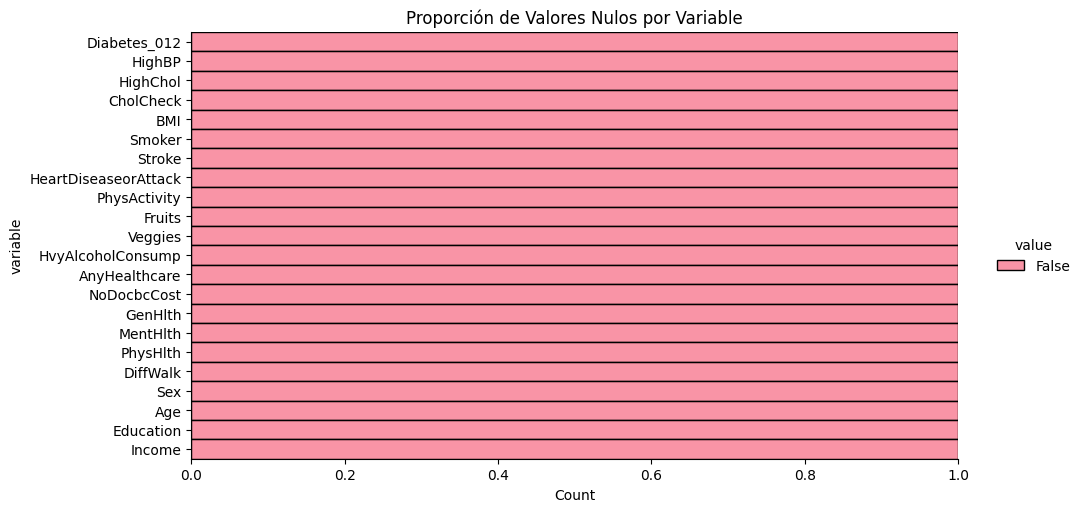

In [5]:
# Visualizar la proporción de datos nulos por variable
data.isnull().melt().pipe(
    lambda df: sb.displot(data=df, y="variable", hue="value", multiple="fill", aspect=2)
)
plt.title("Proporción de Valores Nulos por Variable")
plt.show()

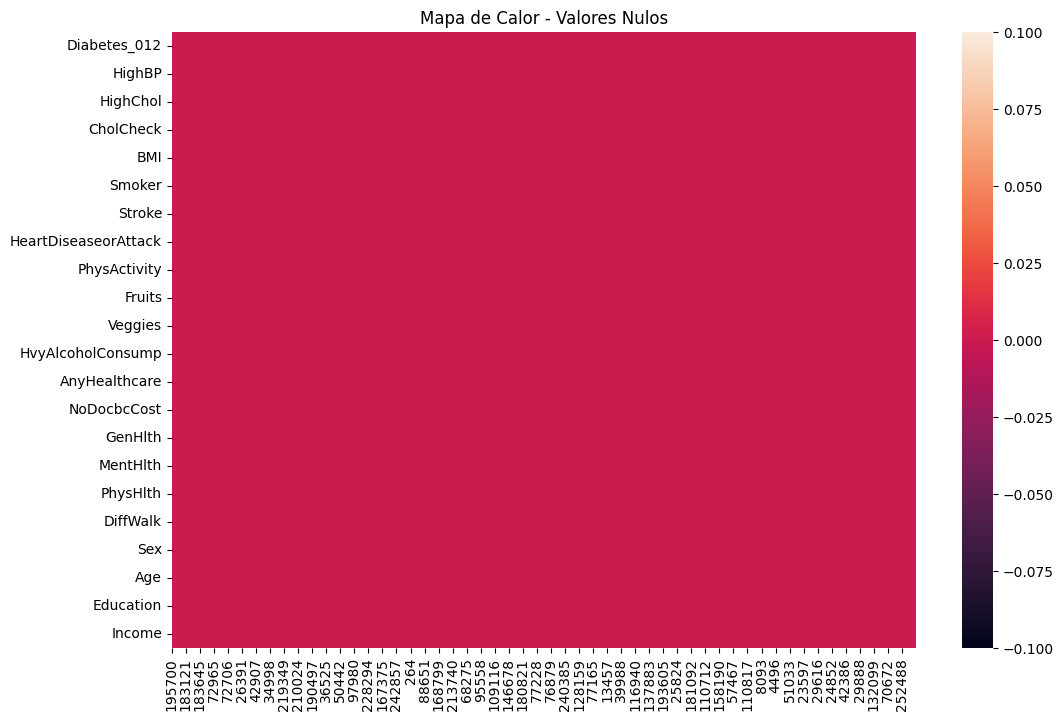

In [6]:
# Heatmap de valores nulos
plt.figure(figsize=(12, 8))
data.isnull().transpose().pipe(lambda df: sb.heatmap(data=df, cbar=True))
plt.title("Mapa de Calor - Valores Nulos")
plt.show()

In [7]:
# Resumen de valores nulos
print("=== RESUMEN DE VALORES NULOS ===")
null_summary = pd.DataFrame(
    {
        "Columna": data.columns,
        "Valores_Nulos": data.isnull().sum(),
        "Porcentaje_Nulos": (data.isnull().sum() / len(data)) * 100,
    }
).sort_values("Valores_Nulos", ascending=False)

display(null_summary[null_summary["Valores_Nulos"] > 0])

=== RESUMEN DE VALORES NULOS ===


,Columna,Valores_Nulos,Porcentaje_Nulos


  ## Análisis de Duplicados

In [8]:
n_rows = len(data)
dup_count = data.duplicated().sum()
dup_pct = dup_count / n_rows * 100

print(f"Filas totales: {n_rows:,}")
print(f"Duplicados exactos (todas las columnas): {dup_count:,} ({dup_pct:.2f}%)")

# Muestra de duplicados (si existen)
dups_df = data[data.duplicated(keep=False)]
if not dups_df.empty:
    print("\nMuestra de filas duplicadas (primeros 10):")
    display(dups_df.head(10))
else:
    print("\nNo se encontraron filas duplicadas.")

Filas totales: 100,000
Duplicados exactos (todas las columnas): 5,945 (5.95%)

Muestra de filas duplicadas (primeros 10):


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8736,0.0,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,6.0,8.0
48218,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,6.0,6.0
196282,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
73181,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
230008,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0
144194,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,6.0,8.0
7703,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,7.0
241480,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
119814,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,10.0,0.0,0.0,0.0,3.0,6.0,8.0
117405,0.0,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0


In [9]:
target_col = "Diabetes_012"
if target_col in data.columns:
    features = [c for c in data.columns if c != target_col]

    # Grupos de filas idénticas en features con 1 etiqueta distinta
    conflicts_mask = data.groupby(features)[target_col].nunique() > 1
    n_conflict_groups = conflicts_mask.sum()
    pct_conflict_groups = n_conflict_groups / len(data) * 100

    print(
        f"Grupos de filas idénticas en features con etiquetas distintas: {n_conflict_groups:,}, {pct_conflict_groups:.2f}%"
    )

    if n_conflict_groups > 0:
        sample_conflicts = (
            data.groupby(features)
            .filter(lambda g: g[target_col].nunique() > 1)
            .head(10)
        )
        print("\nMuestra de conflictos (primeros 10 registros):")
        display(sample_conflicts)

Grupos de filas idénticas en features con etiquetas distintas: 417, 0.42%

Muestra de conflictos (primeros 10 registros):


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
134213,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,6.0,8.0
171442,2.0,0.0,1.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,6.0,8.0
215838,0.0,0.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
6142,0.0,0.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,6.0,8.0
82267,2.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0
215308,0.0,0.0,1.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,5.0,6.0,8.0
102164,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,6.0,6.0
20100,2.0,1.0,1.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0
108728,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0
109626,1.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0


## Análisis Univariado


### Variables Numéricas

In [10]:
# Identificar variables numéricas y categóricas
num_cols = data.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = data.select_dtypes(include=["object"]).columns.tolist()

# Identificar variables binarias (0,1) que deberían tratarse como categóricas
binary_cols = []
for col in num_cols:
    unique_vals = data[col].unique()
    if len(unique_vals) == 2 and set(unique_vals).issubset({0, 1, 0.0, 1.0}):
        binary_cols.append(col)

# Actualizar listas
true_num_cols = [col for col in num_cols if col not in binary_cols]
cat_cols.extend(binary_cols)

print(f"Variables numéricas continuas: {len(true_num_cols)}")
print(f"Variables categóricas/binarias: {len(cat_cols)}")
print(f"\nVariables numéricas: {true_num_cols}")
print(f"Variables categóricas/binarias: {cat_cols}")

Variables numéricas continuas: 8
Variables categóricas/binarias: 14

Variables numéricas: ['Diabetes_012', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
Variables categóricas/binarias: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']


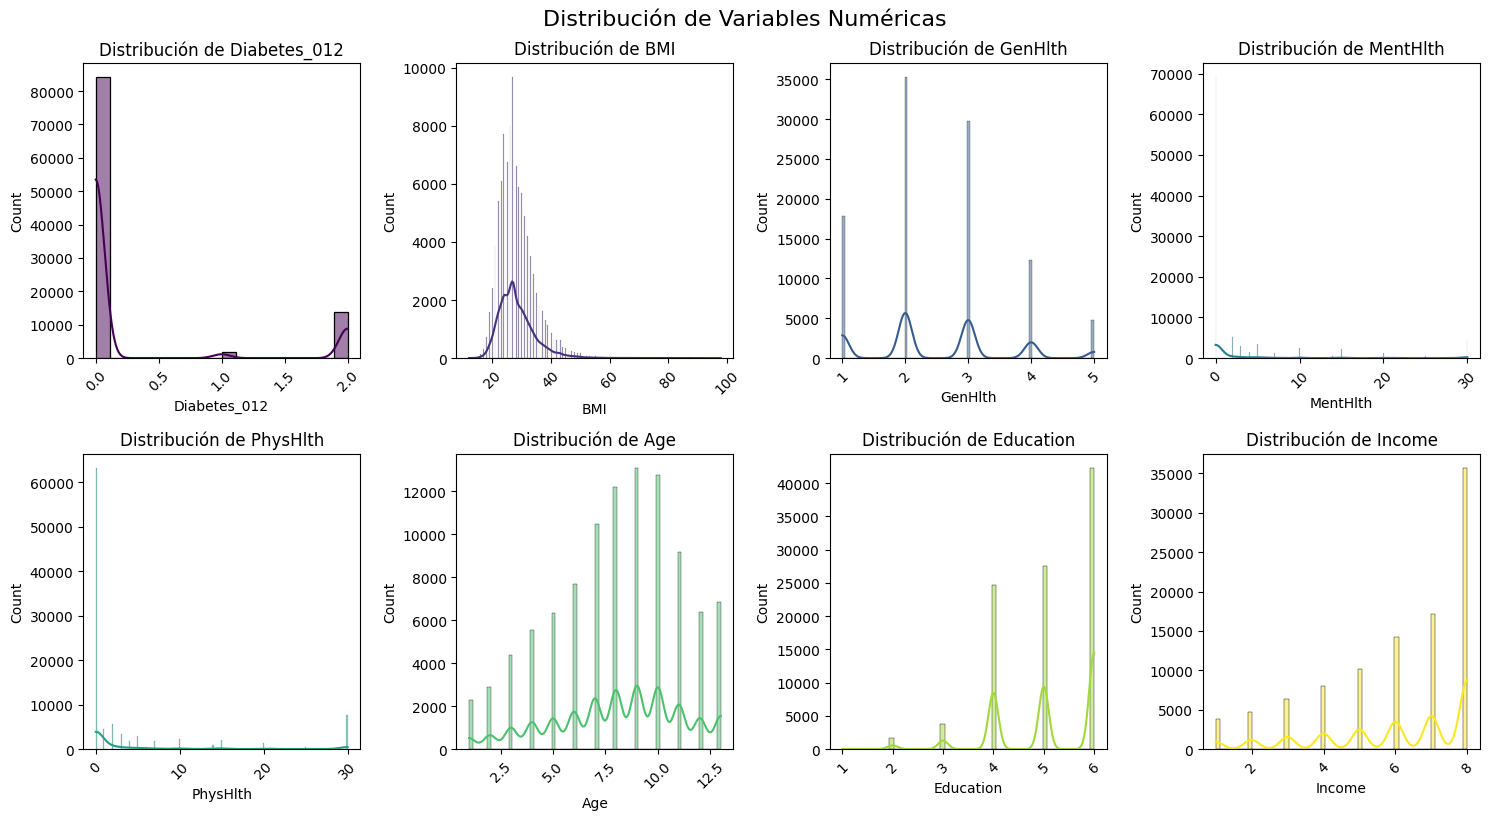

In [11]:
# Histogramas para variables numéricas continuas
if len(true_num_cols) > 0:
    n_cols = min(4, len(true_num_cols))
    n_rows = (len(true_num_cols) + n_cols - 1) // n_cols

    fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
    if n_rows == 1:
        ax = [ax] if n_cols == 1 else ax
    else:
        ax = ax.flatten()

    # Mejora de colores: paleta 'viridis'
    colors = plt.cm.viridis(np.linspace(0, 1, len(true_num_cols)))

    for i, col in enumerate(true_num_cols):
        sb.histplot(data=data, x=col, kde=True, color=colors[i], ax=ax[i])
        ax[i].set_title(f"Distribución de {col}")
        ax[i].tick_params(axis="x", rotation=45)

    # Ocultar subplots vacíos
    for i in range(len(true_num_cols), len(ax)):
        ax[i].set_visible(False)

    fig.tight_layout()
    fig.suptitle("Distribución de Variables Numéricas", y=1.02, fontsize=16)
    plt.show()
else:
    print("No hay variables numéricas continuas para visualizar.")

### Variables Categóricas y Binarias

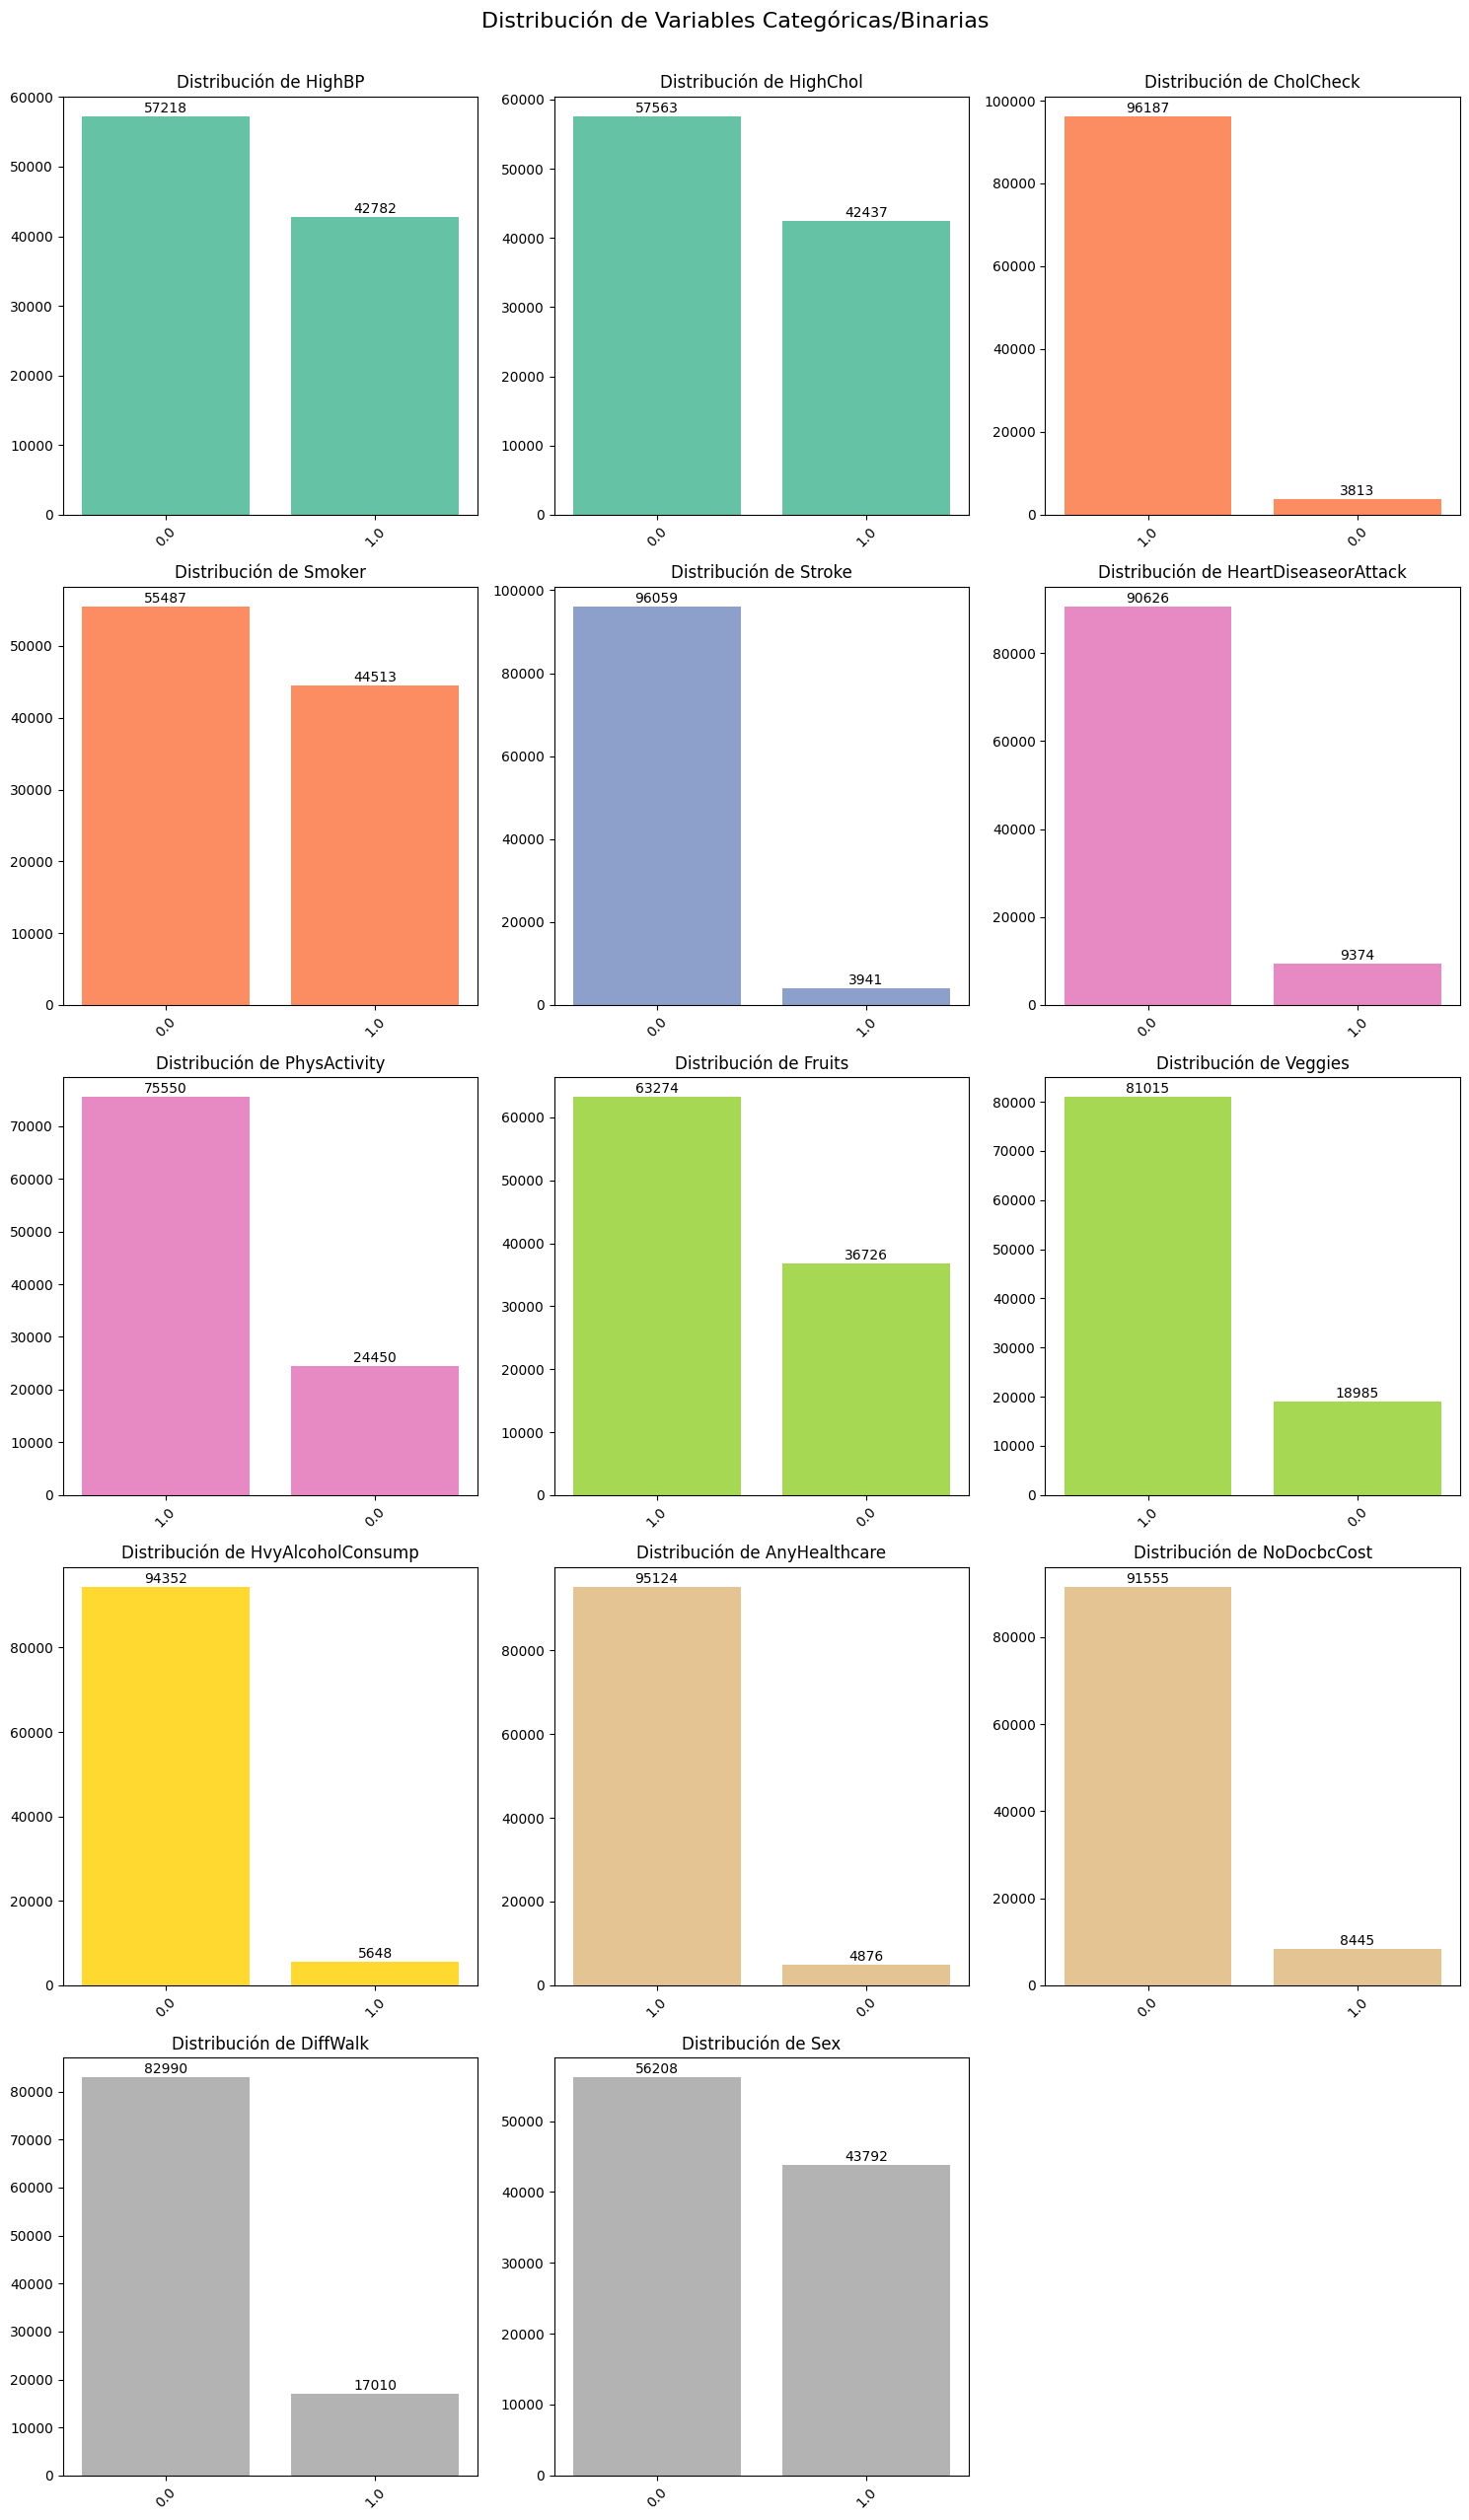

In [12]:
# Gráficos de barras para variables categóricas/binarias
if len(cat_cols) > 0:
    n_cols = min(3, len(cat_cols))
    n_rows = (len(cat_cols) + n_cols - 1) // n_cols

    fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    if n_rows == 1:
        ax = [ax] if n_cols == 1 else ax
    else:
        ax = ax.flatten()

    colors = plt.cm.Set2(np.linspace(0, 1, len(cat_cols)))

    for i, col in enumerate(cat_cols):
        value_counts = data[col].value_counts()
        ax[i].bar(range(len(value_counts)), value_counts.values, color=colors[i])
        ax[i].set_title(f"Distribución de {col}")
        ax[i].set_xticks(range(len(value_counts)))
        ax[i].set_xticklabels(value_counts.index, rotation=45)

        # Añadir etiquetas de valores
        for j, v in enumerate(value_counts.values):
            ax[i].text(j, v + max(value_counts.values) * 0.01, str(v), ha="center")

    # Ocultar subplots vacíos
    for i in range(len(cat_cols), len(ax)):
        ax[i].set_visible(False)

    fig.tight_layout()
    fig.suptitle("Distribución de Variables Categóricas/Binarias", y=1.02, fontsize=16)
    plt.show()

=== ANÁLISIS DE VARIABLE OBJETIVO ===
Distribución de Diabetes_012:


,Clase,Frecuencia,Porcentaje,Etiqueta
0,0.0,84241,84.241,Sin Diabetes
1,1.0,1826,1.826,Prediabetes
2,2.0,13933,13.933,Diabetes


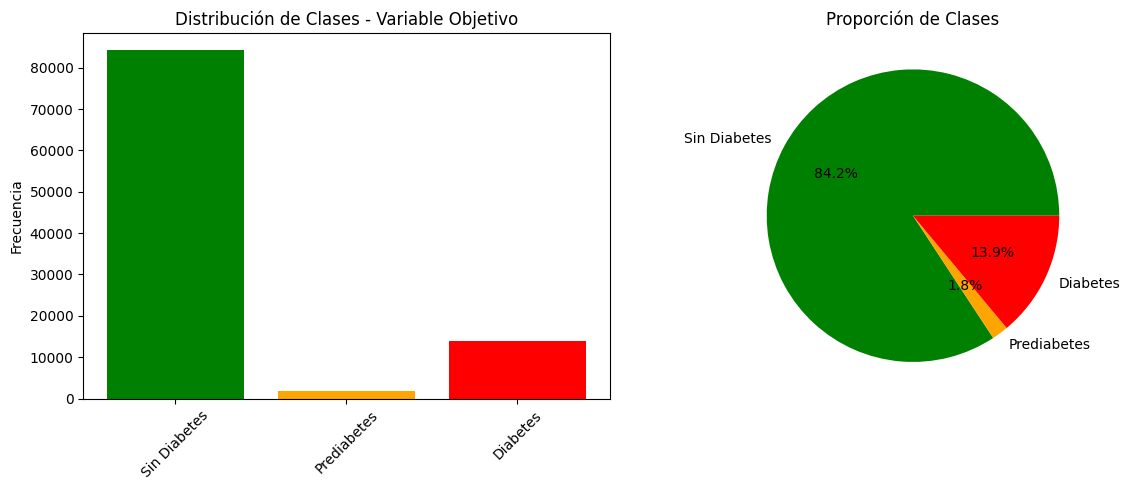

In [13]:
# Análisis específico de la variable objetivo
target_col = "Diabetes_012"
if target_col in data.columns:
    print("=== ANÁLISIS DE VARIABLE OBJETIVO ===")
    print(f"Distribución de {target_col}:")
    target_dist = data[target_col].value_counts().sort_index()
    target_pct = data[target_col].value_counts(normalize=True).sort_index() * 100

    target_summary = pd.DataFrame(
        {
            "Clase": target_dist.index,
            "Frecuencia": target_dist.values,
            "Porcentaje": target_pct.values,
        }
    )
    target_summary["Etiqueta"] = target_summary["Clase"].map(
        {0: "Sin Diabetes", 1: "Prediabetes", 2: "Diabetes"}
    )
    display(target_summary)

    # Visualización de la variable objetivo
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Gráfico de barras
    ax1.bar(
        target_summary["Etiqueta"],
        target_summary["Frecuencia"],
        color=["green", "orange", "red"],
    )
    ax1.set_title("Distribución de Clases - Variable Objetivo")
    ax1.set_ylabel("Frecuencia")
    ax1.tick_params(axis="x", rotation=45)

    # Gráfico de pastel
    ax2.pie(
        target_summary["Frecuencia"],
        labels=target_summary["Etiqueta"],
        autopct="%1.1f%%",
        colors=["green", "orange", "red"],
    )
    ax2.set_title("Proporción de Clases")

    plt.tight_layout()
    plt.show()

## Análisis de Correlaciones

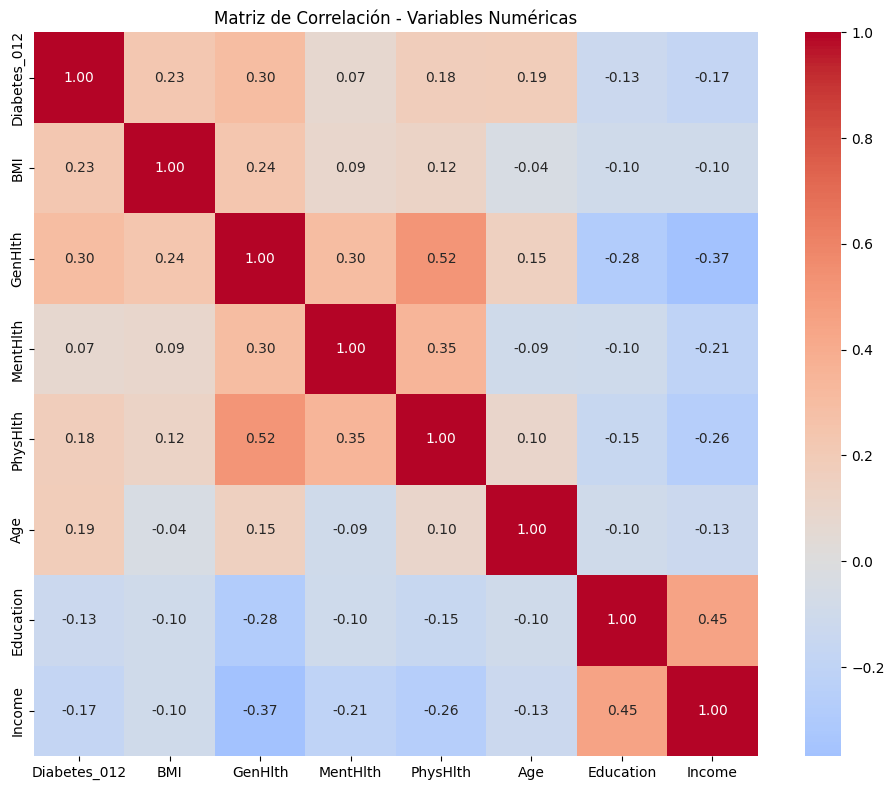

In [14]:
# Matriz de correlación para variables numéricas
if len(true_num_cols) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = data[true_num_cols].corr()
    sb.heatmap(
        correlation_matrix,
        annot=True,
        cmap="coolwarm",
        center=0,
        square=True,
        fmt=".2f",
    )
    plt.title("Matriz de Correlación - Variables Numéricas")
    plt.tight_layout()
    plt.show()

## Resumen del Análisis Exploratorio

In [15]:
print("=== RESUMEN DEL ANÁLISIS EXPLORATORIO ===")
print(f"Dataset con {data.shape[0]:,} filas y {data.shape[1]} columnas")
print(f"Variables numéricas continuas: {len(true_num_cols)}")
print(f"Variables categóricas/binarias: {len(cat_cols)}")
print(f"Variables con valores nulos: {data.isnull().any().sum()}")
print(f"Filas duplicadas: {dup_count:,} ({dup_pct:.2f}%)")
print(f"Variable objetivo: {target_col}")

if target_col in data.columns:
    print(f"Balance de clases:")
    for idx, row in target_summary.iterrows():
        print(
            f"   - {row['Etiqueta']}: {row['Frecuencia']:,} ({row['Porcentaje']:.1f}%)"
        )

=== RESUMEN DEL ANÁLISIS EXPLORATORIO ===
Dataset con 100,000 filas y 22 columnas
Variables numéricas continuas: 8
Variables categóricas/binarias: 14
Variables con valores nulos: 0
Filas duplicadas: 5,945 (5.95%)
Variable objetivo: Diabetes_012
Balance de clases:
   - Sin Diabetes: 84,241 (84.2%)
   - Prediabetes: 1,826 (1.8%)
   - Diabetes: 13,933 (13.9%)


# 3. Preparación de los Datos

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import time
from tqdm.notebook import tqdm

## 3.1 Eliminación de Duplicados

In [17]:
print("=== ELIMINACIÓN DE DUPLICADOS ===")
print(f"Filas antes de eliminación: {data.shape[0]:,}")
print(f"Duplicados identificados: {data.duplicated().sum():,}")

# Eliminar duplicados conservando la primera ocurrencia
data_clean = data.drop_duplicates(keep="first")

print(f"Filas después de eliminación: {data_clean.shape[0]:,}")
print(f"Filas eliminadas: {data.shape[0] - data_clean.shape[0]:,}")
print(
    f"Porcentaje de reducción: {((data.shape[0] - data_clean.shape[0]) / data.shape[0]) * 100:.2f}%"
)

=== ELIMINACIÓN DE DUPLICADOS ===
Filas antes de eliminación: 100,000
Duplicados identificados: 5,945
Filas después de eliminación: 94,055
Filas eliminadas: 5,945
Porcentaje de reducción: 5.95%


## 3.2 Definición de Variables y División de Datos

In [18]:
# Definir variables
numeric_vars = [
    "BMI",
    "MentHlth",
    "PhysHlth",
]
categorical_vars = [
    "Diabetes_012",
    "GenHlth",
    "HighBP",
    "HighChol",
    "CholCheck",
    "Smoker",
    "Stroke",
    "HeartDiseaseorAttack",
    "PhysActivity",
    "Fruits",
    "Veggies",
    "HvyAlcoholConsump",
    "AnyHealthcare",
    "NoDocbcCost",
    "DiffWalk",
    "Sex",
    "Age",
    "Education",
    "Income",
]

print("=== DEFINICIÓN DE VARIABLES ===")
print(f"Variables numéricas: {len(numeric_vars)} variables")
print(f"Variables categóricas/binarias: {len(categorical_vars)} variables")
print(f"Total de variables: {len(numeric_vars) + len(categorical_vars)}")

# Separar features y target
target_col = "Diabetes_012"
feature_cols = [col for col in data_clean.columns if col != target_col]

X = data_clean[feature_cols]
y = data_clean[target_col]

print(f"\nForma de X (features): {X.shape}")
print(f"Forma de y (target): {y.shape}")
print(f"\nDistribución de clases en datos limpios:")
print(y.value_counts().sort_index())

=== DEFINICIÓN DE VARIABLES ===
Variables numéricas: 3 variables
Variables categóricas/binarias: 19 variables
Total de variables: 22

Forma de X (features): (94055, 21)
Forma de y (target): (94055,)

Distribución de clases en datos limpios:
Diabetes_012
0.0    78344
1.0     1826
2.0    13885
Name: count, dtype: int64


In [19]:
# Split estratificado 90/10
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

print("=== DIVISIÓN ESTRATIFICADA 90/10 ===")
print(
    f"Tamaño conjunto entrenamiento: {X_train.shape[0]:,} ({X_train.shape[0]/len(X)*100:.1f}%)"
)
print(
    f"Tamaño conjunto prueba: {X_test.shape[0]:,} ({X_test.shape[0]/len(X)*100:.1f}%)"
)

print("\nDistribución de clases - Entrenamiento:")
train_dist = y_train.value_counts().sort_index()
for clase, count in train_dist.items():
    etiqueta = {0: "Sin Diabetes", 1: "Prediabetes", 2: "Diabetes"}[clase]
    print(f"   {etiqueta}: {count:,} ({count/len(y_train)*100:.1f}%)")

print("\nDistribución de clases - Prueba:")
test_dist = y_test.value_counts().sort_index()
for clase, count in test_dist.items():
    etiqueta = {0: "Sin Diabetes", 1: "Prediabetes", 2: "Diabetes"}[clase]
    print(f"   {etiqueta}: {count:,} ({count/len(y_test)*100:.1f}%)")

=== DIVISIÓN ESTRATIFICADA 90/10 ===
Tamaño conjunto entrenamiento: 84,649 (90.0%)
Tamaño conjunto prueba: 9,406 (10.0%)

Distribución de clases - Entrenamiento:
   Sin Diabetes: 70,509 (83.3%)
   Prediabetes: 1,643 (1.9%)
   Diabetes: 12,497 (14.8%)

Distribución de clases - Prueba:
   Sin Diabetes: 7,835 (83.3%)
   Prediabetes: 183 (1.9%)
   Diabetes: 1,388 (14.8%)


## 3.3 Balanceo de Clases con SMOTE

In [20]:
# Aplicar SMOTE solo al conjunto de entrenamiento
print("=== BALANCEO DE CLASES CON SMOTE ===")
print("Distribución ANTES de SMOTE:")
for clase, count in y_train.value_counts().sort_index().items():
    etiqueta = {0: "Sin Diabetes", 1: "Prediabetes", 2: "Diabetes"}[clase]
    print(f"   {etiqueta}: {count:,} ({count/len(y_train)*100:.1f}%)")

# Aplicar SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"\nTamaño del conjunto de entrenamiento:")
print(f"   Antes de SMOTE: {X_train.shape[0]:,} muestras")
print(f"   Después de SMOTE: {X_train_balanced.shape[0]:,} muestras")
print(
    f"   Incremento: {X_train_balanced.shape[0] - X_train.shape[0]:,} muestras sintéticas"
)

print("\nDistribución DESPUÉS de SMOTE:")
for clase, count in pd.Series(y_train_balanced).value_counts().sort_index().items():
    etiqueta = {0: "Sin Diabetes", 1: "Prediabetes", 2: "Diabetes"}[clase]
    print(f"   {etiqueta}: {count:,} ({count/len(y_train_balanced)*100:.1f}%)")

=== BALANCEO DE CLASES CON SMOTE ===
Distribución ANTES de SMOTE:
   Sin Diabetes: 70,509 (83.3%)
   Prediabetes: 1,643 (1.9%)
   Diabetes: 12,497 (14.8%)

Tamaño del conjunto de entrenamiento:
   Antes de SMOTE: 84,649 muestras
   Después de SMOTE: 211,527 muestras
   Incremento: 126,878 muestras sintéticas

Distribución DESPUÉS de SMOTE:
   Sin Diabetes: 70,509 (33.3%)
   Prediabetes: 70,509 (33.3%)
   Diabetes: 70,509 (33.3%)


## 3.4 Escalado de Variables Numéricas

In [ ]:
# Escalado de variables numéricas para KNN y SVM
numeric_features = [
    "BMI",
    "MentHlth",
    "PhysHlth",
]

scaler = StandardScaler()
X_train_balanced_scaled = X_train_balanced.copy()
X_test_scaled = X_test.copy()

# Escalar solo las variables numéricas
X_train_balanced_scaled[numeric_features] = scaler.fit_transform(
    X_train_balanced[numeric_features]
)
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

print("=== ESCALADO DE VARIABLES NUMÉRICAS ===")
print("Variables escaladas:", numeric_features)
print(f"Estadísticas después del escalado (conjunto de entrenamiento):")
print(X_train_balanced_scaled[numeric_features].describe().round(2))

=== ESCALADO DE VARIABLES NUMÉRICAS ===
Variables escaladas: ['BMI', 'MentHlth', 'PhysHlth']
Estadísticas después del escalado (conjunto de entrenamiento):
             BMI   MentHlth   PhysHlth
count  211527.00  211527.00  211527.00
mean        0.00       0.00      -0.00
std         1.00       1.00       1.00
min        -2.62      -0.48      -0.59
25%        -0.64      -0.48      -0.59
50%        -0.16      -0.48      -0.59
75%         0.42      -0.14       0.09
max         9.83       3.05       2.39


# 4. Modelado

In [22]:
from sklearn.model_selection import GridSearchCV

cv_folds = 3
cv_strategy = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)

model_results = {}


def evaluate_model(
    name, model, X_train_data, y_train_data, X_test_data, y_test_data, use_scaled=False
):
    print(f"\n=== EVALUANDO {name.upper()} ===")
    start_time = time.time()

    # Cross-validation
    cv_scores = []
    for train_idx, val_idx in tqdm(
        cv_strategy.split(X_train_data, y_train_data), total=cv_folds, desc="CV Folds"
    ):
        X_train_fold = X_train_data.iloc[train_idx]
        X_val_fold = X_train_data.iloc[val_idx]
        y_train_fold = y_train_data.iloc[train_idx]
        y_val_fold = y_train_data.iloc[val_idx]

        model.fit(X_train_fold, y_train_fold)
        cv_scores.append(accuracy_score(y_val_fold, model.predict(X_val_fold)))

    cv_scores = np.array(cv_scores)

    # Entrenar modelo final
    model.fit(X_train_data, y_train_data)

    # Predicciones
    y_pred = model.predict(X_test_data)

    # Métricas
    accuracy = accuracy_score(y_test_data, y_pred)
    f1_macro = f1_score(y_test_data, y_pred, average="macro")
    f1_weighted = f1_score(y_test_data, y_pred, average="weighted")

    elapsed_time = time.time() - start_time

    # Guardar resultados
    model_results[name] = {
        "model": model,
        "cv_scores": cv_scores,
        "cv_mean": cv_scores.mean(),
        "cv_std": cv_scores.std(),
        "test_accuracy": accuracy,
        "f1_macro": f1_macro,
        "f1_weighted": f1_weighted,
        "predictions": y_pred,
        "time": elapsed_time,
    }

    print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"F1-Score (Macro): {f1_macro:.4f}")
    print(f"F1-Score (Weighted): {f1_weighted:.4f}")
    print(f"Tiempo de entrenamiento: {elapsed_time:.2f}s")

    return model

## 4.1 Logistic Regression

In [23]:
# Logistic Regression
param_grid_lr = {
    "penalty": ["l1", "l2", "elasticnet"],
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

logistic_reg = LogisticRegression(random_state=42, max_iter=1000)
grid_search_lr = GridSearchCV(
    logistic_reg, param_grid_lr, cv=3, scoring="accuracy", n_jobs=-1, verbose=2
)

print("Realizando GridSearch para Logistic Regression...")
grid_search_lr.fit(X_train_balanced, y_train_balanced)

print(f"Mejores parámetros: {grid_search_lr.best_params_}")
print(f"Mejor score CV: {grid_search_lr.best_score_:.4f}")

logistic_reg = evaluate_model(
    "Logistic Regression",
    grid_search_lr.best_estimator_,
    X_train_balanced,
    y_train_balanced,
    X_test,
    y_test,
)

Realizando GridSearch para Logistic Regression...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END .......................C=0.0001, penalty=elasticnet; total time=   0.1s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.1s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.1s
[CV] END .......................C=0.0001, penalty=elasticnet; total time=   0.2s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.2s
[CV] END .......................C=0.0001, penalty=elasticnet; total time=   0.1s
[CV] END ................................C=0.001, penalty=l1; total time=   0.1s
[CV] END ................................C=0.001, penalty=l1; total time=   0.1s
[CV] END ................................C=0.001, penalty=l1; total time=   0.1s
[CV] END ........................C=0.001, penalty=elasticnet; total time=   0.1s
[CV] END ........................C=0.001, penalty=elasticnet; total time=   0.1

CV Folds:   0%|          | 0/3 [00:00<?, ?it/s]

Cross-Validation Accuracy: 0.5272 (±0.0022)
Test Accuracy: 0.6284
F1-Score (Macro): 0.4237
F1-Score (Weighted): 0.7033
Tiempo de entrenamiento: 57.19s


## 4.2 K-Nearest Neighbors (KNN)

In [24]:
# KNN
param_grid_knn = {"n_neighbors": [3, 5, 7, 9], "p": [1, 2]}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(
    knn, param_grid_knn, cv=3, scoring="accuracy", n_jobs=-1, verbose=2
)

print("Realizando GridSearch para KNN...")
grid_search_knn.fit(X_train_balanced_scaled, y_train_balanced)

print(f"Mejores parámetros: {grid_search_knn.best_params_}")
print(f"Mejor score CV: {grid_search_knn.best_score_:.4f}")

knn = evaluate_model(
    "KNN",
    grid_search_knn.best_estimator_,
    X_train_balanced_scaled,
    y_train_balanced,
    X_test_scaled,
    y_test,
)

Realizando GridSearch para KNN...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END .................................n_neighbors=3, p=2; total time=  44.0s
[CV] END .................................n_neighbors=3, p=2; total time=  44.0s
[CV] END .................................n_neighbors=3, p=2; total time=  44.3s
[CV] END .................................n_neighbors=5, p=2; total time=  45.5s
[CV] END .................................n_neighbors=5, p=2; total time=  45.8s
[CV] END .................................n_neighbors=5, p=2; total time=  42.0s
[CV] END .................................n_neighbors=5, p=1; total time= 3.6min
[CV] END .................................n_neighbors=3, p=1; total time= 3.6min
[CV] END .................................n_neighbors=5, p=1; total time= 3.7min
[CV] END .................................n_neighbors=3, p=1; total time= 3.7min
[CV] END .................................n_neighbors=3, p=1; total time= 3.7min
[CV] END ......

CV Folds:   0%|          | 0/3 [00:00<?, ?it/s]

Cross-Validation Accuracy: 0.9131 (±0.0004)
Test Accuracy: 0.7401
F1-Score (Macro): 0.4011
F1-Score (Weighted): 0.7554
Tiempo de entrenamiento: 79.37s


## 4.3 Support Vector Machine (SVM)

In [25]:
# SVM
param_grid_svm = {
    "C": [1],
    "kernel": ["linear", "rbf"],
}

svm = SVC(random_state=42)
grid_search_svm = GridSearchCV(
    svm, param_grid_svm, cv=3, scoring="accuracy", n_jobs=-1, verbose=2
)

print("Realizando GridSearch para SVM...")
grid_search_svm.fit(X_train_balanced_scaled, y_train_balanced)

print(f"Mejores parámetros: {grid_search_svm.best_params_}")
print(f"Mejor score CV: {grid_search_svm.best_score_:.4f}")

svm = evaluate_model(
    "SVM",
    grid_search_svm.best_estimator_,
    X_train_balanced_scaled,
    y_train_balanced,
    X_test_scaled,
    y_test,
)

Realizando GridSearch para SVM...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END ....................................C=1, kernel=rbf; total time=33.7min
[CV] END ....................................C=1, kernel=rbf; total time=38.2min
[CV] END ....................................C=1, kernel=rbf; total time=38.3min
[CV] END .................................C=1, kernel=linear; total time=53.4min
[CV] END .................................C=1, kernel=linear; total time=58.9min
[CV] END .................................C=1, kernel=linear; total time=58.9min
Mejores parámetros: {'C': 1, 'kernel': 'rbf'}
Mejor score CV: 0.5800

=== EVALUANDO SVM ===


CV Folds:   0%|          | 0/3 [00:00<?, ?it/s]

Cross-Validation Accuracy: 0.5815 (±0.0018)
Test Accuracy: 0.6371
F1-Score (Macro): 0.4230
F1-Score (Weighted): 0.7073
Tiempo de entrenamiento: 3694.75s


## 4.4 Decision Tree

In [26]:
# Decision Tree
param_grid_dt = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_leaf": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 3, 4],
}

dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(
    dt, param_grid_dt, cv=3, scoring="accuracy", n_jobs=-1, verbose=2
)

print("Realizando GridSearch para Decision Tree...")
grid_search_dt.fit(X_train_balanced, y_train_balanced)

print(f"Mejores parámetros: {grid_search_dt.best_params_}")
print(f"Mejor score CV: {grid_search_dt.best_score_:.4f}")

dt = evaluate_model(
    "Decision Tree",
    grid_search_dt.best_estimator_,
    X_train_balanced,
    y_train_balanced,
    X_test,
    y_test,
)

Realizando GridSearch para Decision Tree...
Fitting 3 folds for each of 225 candidates, totalling 675 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=None, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=None, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=None, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=None, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=None, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=None, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=None, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=None, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=Non

CV Folds:   0%|          | 0/3 [00:00<?, ?it/s]

Cross-Validation Accuracy: 0.8486 (±0.0006)
Test Accuracy: 0.7891
F1-Score (Macro): 0.4009
F1-Score (Weighted): 0.7773
Tiempo de entrenamiento: 7.43s


# 5. Evaluación de Modelos

## 5.1 Comparación de Resultados

In [27]:
# Crear tabla comparativa de resultados
results_df = pd.DataFrame(
    {
        "Modelo": list(model_results.keys()),
        "CV_Mean": [model_results[model]["cv_mean"] for model in model_results],
        "CV_Std": [model_results[model]["cv_std"] for model in model_results],
        "Test_Accuracy": [
            model_results[model]["test_accuracy"] for model in model_results
        ],
        "F1_Macro": [model_results[model]["f1_macro"] for model in model_results],
        "F1_Weighted": [model_results[model]["f1_weighted"] for model in model_results],
        "Tiempo(s)": [model_results[model]["time"] for model in model_results],
    }
)

# Ordenar por Test Accuracy descendente
results_df = results_df.sort_values("Test_Accuracy", ascending=False).reset_index(
    drop=True
)

print("=== COMPARACIÓN DE MODELOS ===")
print(results_df.round(4))

# Identificar el mejor modelo
best_model_name = results_df.iloc[0]["Modelo"]
best_accuracy = results_df.iloc[0]["Test_Accuracy"]

print(f"\n🏆 MEJOR MODELO: {best_model_name}")
print(f"Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"Objetivo alcanzado (>85%): {'✅ SÍ' if best_accuracy > 0.85 else '❌ NO'}")

=== COMPARACIÓN DE MODELOS ===
                Modelo  CV_Mean  CV_Std  Test_Accuracy  F1_Macro  F1_Weighted  \
0        Decision Tree   0.8486  0.0006         0.7891    0.4009       0.7773   
1                  KNN   0.9131  0.0004         0.7401    0.4011       0.7554   
2                  SVM   0.5815  0.0018         0.6371    0.4230       0.7073   
3  Logistic Regression   0.5272  0.0022         0.6284    0.4237       0.7033   

   Tiempo(s)  
0     7.4326  
1    79.3716  
2  3694.7519  
3    57.1885  

🏆 MEJOR MODELO: Decision Tree
Accuracy: 0.7891 (78.91%)
Objetivo alcanzado (>85%): ❌ NO


## 5.2 Visualización de Resultados

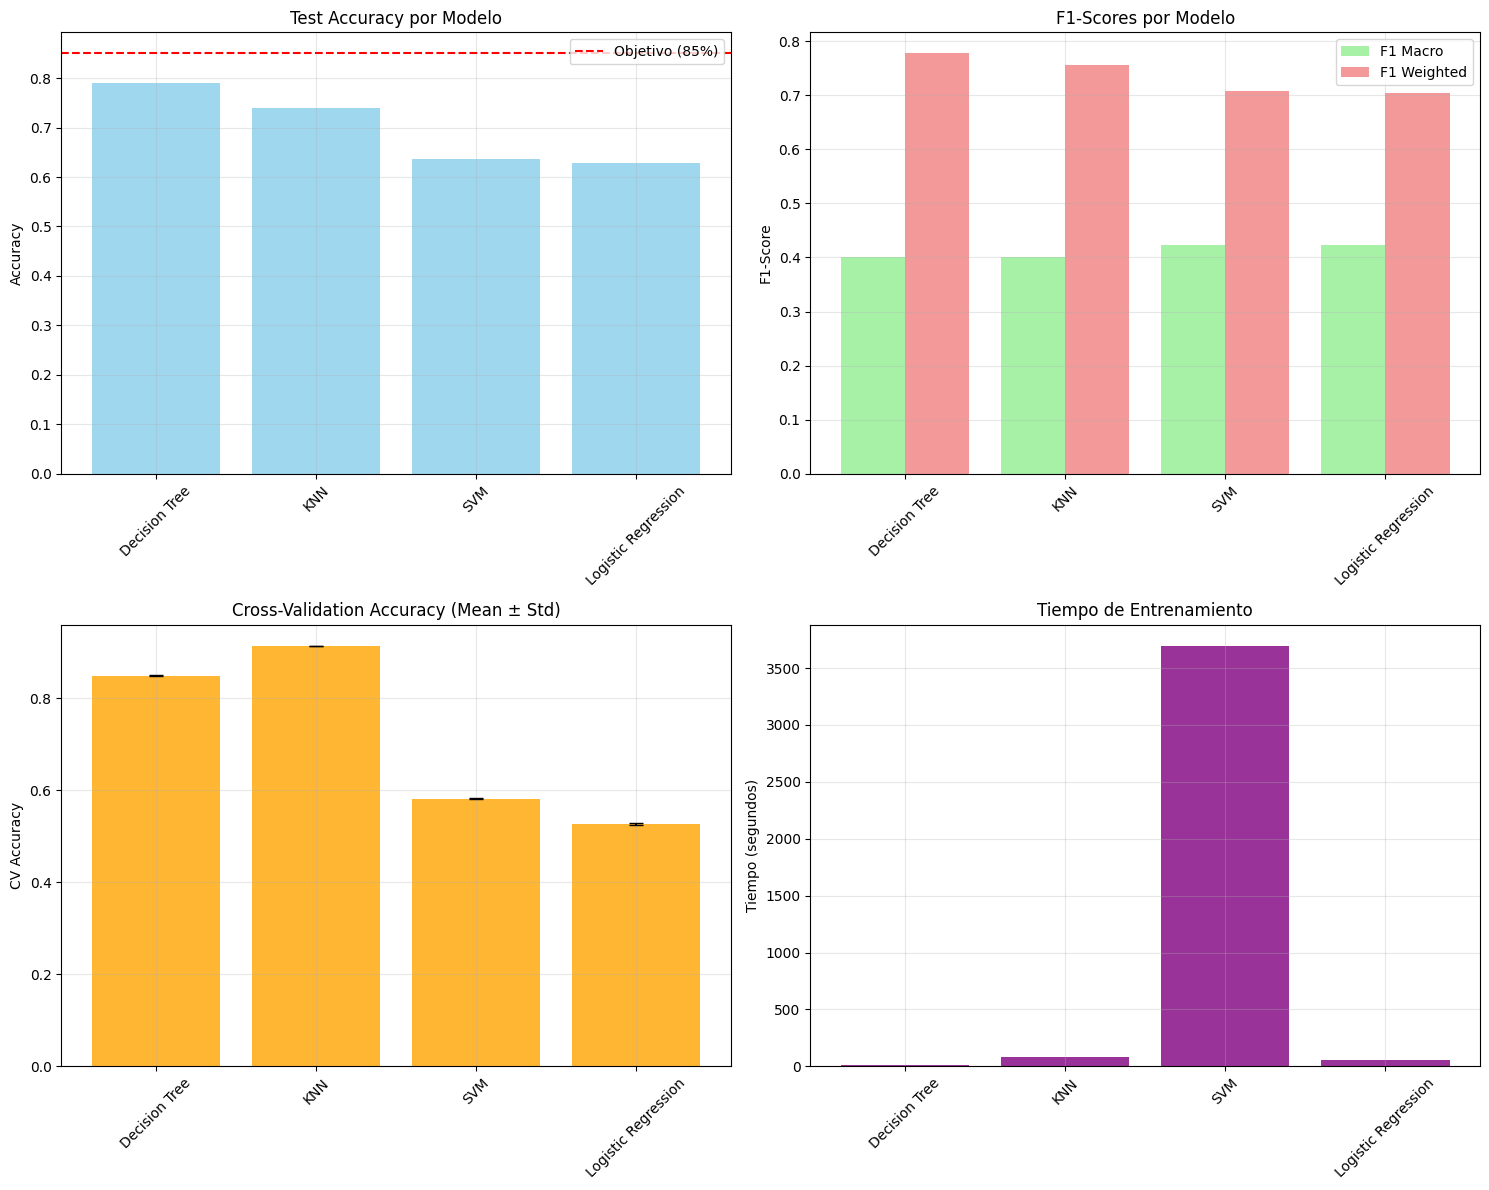

In [28]:
# Visualización comparativa
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Accuracy Comparison
ax1.bar(results_df["Modelo"], results_df["Test_Accuracy"], color="skyblue", alpha=0.8)
ax1.axhline(y=0.85, color="red", linestyle="--", label="Objetivo (85%)")
ax1.set_title("Test Accuracy por Modelo")
ax1.set_ylabel("Accuracy")
ax1.tick_params(axis="x", rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. F1-Score Comparison
x_pos = range(len(results_df))
ax2.bar(
    [p - 0.2 for p in x_pos],
    results_df["F1_Macro"],
    width=0.4,
    label="F1 Macro",
    alpha=0.8,
    color="lightgreen",
)
ax2.bar(
    [p + 0.2 for p in x_pos],
    results_df["F1_Weighted"],
    width=0.4,
    label="F1 Weighted",
    alpha=0.8,
    color="lightcoral",
)
ax2.set_title("F1-Scores por Modelo")
ax2.set_ylabel("F1-Score")
ax2.set_xticks(x_pos)
ax2.set_xticklabels(results_df["Modelo"], rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Cross-validation scores
ax3.bar(
    results_df["Modelo"],
    results_df["CV_Mean"],
    yerr=results_df["CV_Std"],
    capsize=5,
    color="orange",
    alpha=0.8,
)
ax3.set_title("Cross-Validation Accuracy (Mean ± Std)")
ax3.set_ylabel("CV Accuracy")
ax3.tick_params(axis="x", rotation=45)
ax3.grid(True, alpha=0.3)

# 4. Training time
ax4.bar(results_df["Modelo"], results_df["Tiempo(s)"], color="purple", alpha=0.8)
ax4.set_title("Tiempo de Entrenamiento")
ax4.set_ylabel("Tiempo (segundos)")
ax4.tick_params(axis="x", rotation=45)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5.3 Matrices de Confusión y Reportes Detallados

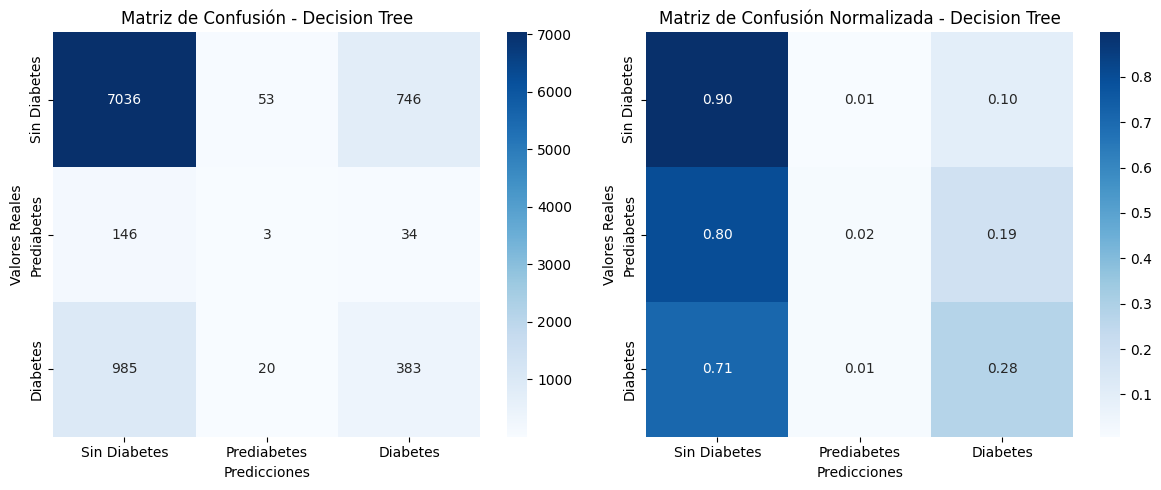

=== REPORTE DETALLADO - DECISION TREE ===
              precision    recall  f1-score   support

Sin Diabetes     0.8615    0.8980    0.8794      7835
 Prediabetes     0.0395    0.0164    0.0232       183
    Diabetes     0.3293    0.2759    0.3003      1388

    accuracy                         0.7891      9406
   macro avg     0.4101    0.3968    0.4009      9406
weighted avg     0.7670    0.7891    0.7773      9406



In [29]:
# Matriz de confusión y reporte del mejor modelo
best_model = model_results[best_model_name]
y_pred_best = best_model["predictions"]

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_best)
class_names = ["Sin Diabetes", "Prediabetes", "Diabetes"]

plt.figure(figsize=(12, 5))

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sb.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
)
plt.title(f"Matriz de Confusión - {best_model_name}")
plt.ylabel("Valores Reales")
plt.xlabel("Predicciones")

# Subplot 2: Matriz de confusión normalizada
plt.subplot(1, 2, 2)
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
sb.heatmap(
    cm_normalized,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
)
plt.title(f"Matriz de Confusión Normalizada - {best_model_name}")
plt.ylabel("Valores Reales")
plt.xlabel("Predicciones")

plt.tight_layout()
plt.show()

# Reporte de clasificación detallado
print(f"=== REPORTE DETALLADO - {best_model_name.upper()} ===")
print(classification_report(y_test, y_pred_best, target_names=class_names, digits=4))

## 5.4 Análisis por Clases

=== MÉTRICAS POR CLASE - DECISION TREE ===


,Clase,Precision,Recall,F1-Score,Support
0,Sin Diabetes,0.8615,0.8980,0.8794,7835
1,Prediabetes,0.0395,0.0164,0.0232,183
2,Diabetes,0.3293,0.2759,0.3003,1388


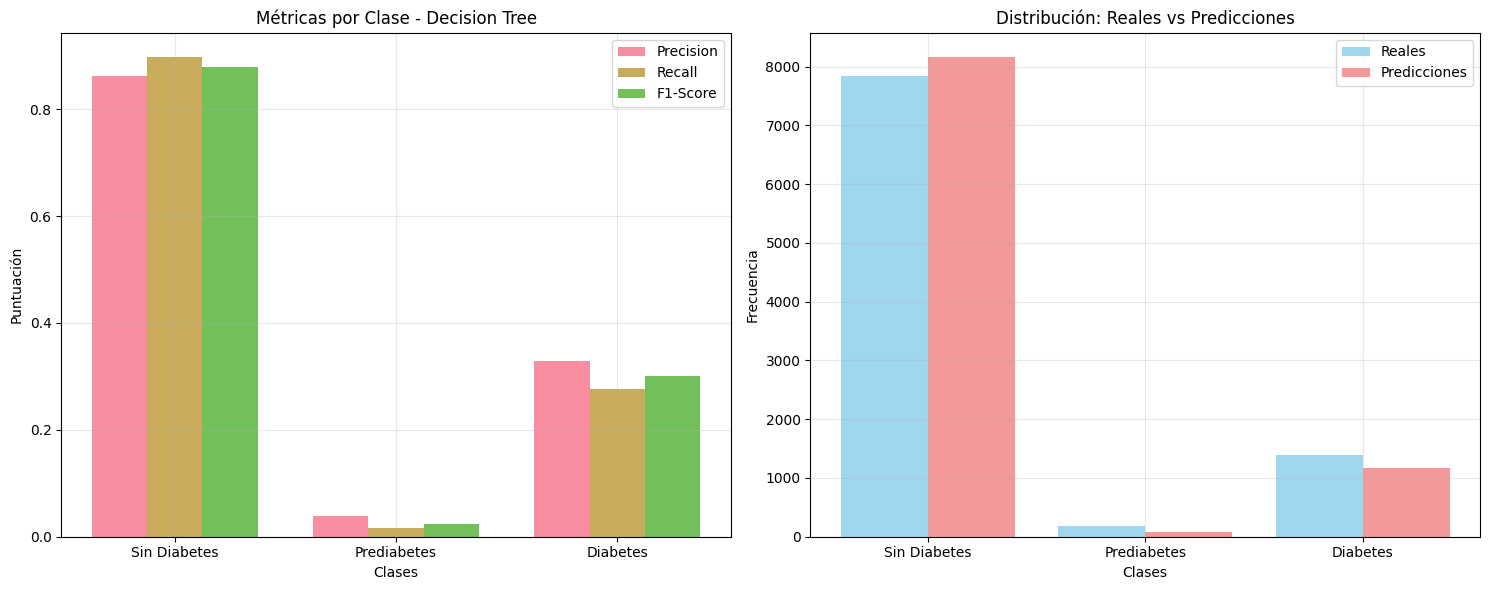

In [30]:
# Análisis detallado por clases para el mejor modelo
precision_per_class = precision_score(y_test, y_pred_best, average=None)
recall_per_class = recall_score(y_test, y_pred_best, average=None)
f1_per_class = f1_score(y_test, y_pred_best, average=None)

# Crear DataFrame de métricas por clase
class_metrics = pd.DataFrame(
    {
        "Clase": class_names,
        "Precision": precision_per_class,
        "Recall": recall_per_class,
        "F1-Score": f1_per_class,
        "Support": [sum(y_test == i) for i in range(3)],
    }
)

print(f"=== MÉTRICAS POR CLASE - {best_model_name.upper()} ===")
display(class_metrics.round(4))

# Visualización de métricas por clase
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras agrupadas
x_pos = np.arange(len(class_names))
width = 0.25

ax1.bar(x_pos - width, precision_per_class, width, label="Precision", alpha=0.8)
ax1.bar(x_pos, recall_per_class, width, label="Recall", alpha=0.8)
ax1.bar(x_pos + width, f1_per_class, width, label="F1-Score", alpha=0.8)

ax1.set_xlabel("Clases")
ax1.set_ylabel("Puntuación")
ax1.set_title(f"Métricas por Clase - {best_model_name}")
ax1.set_xticks(x_pos)
ax1.set_xticklabels(class_names)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Distribución de predicciones vs reales
test_distribution = pd.Series(y_test).value_counts().sort_index()
pred_distribution = pd.Series(y_pred_best).value_counts().sort_index()

ax2.bar(
    [p - 0.2 for p in range(3)],
    test_distribution.values,
    width=0.4,
    label="Reales",
    alpha=0.8,
    color="skyblue",
)
ax2.bar(
    [p + 0.2 for p in range(3)],
    pred_distribution.values,
    width=0.4,
    label="Predicciones",
    alpha=0.8,
    color="lightcoral",
)

ax2.set_xlabel("Clases")
ax2.set_ylabel("Frecuencia")
ax2.set_title("Distribución: Reales vs Predicciones")
ax2.set_xticks(range(3))
ax2.set_xticklabels(class_names)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5.5 Resumen Final

In [31]:
print("=" * 60)
print("                 RESUMEN FINAL DEL PROYECTO")
print("=" * 60)

print("\nDATOS:")
print(f"• Dataset original: {data.shape[0]:,} filas, {data.shape[1]} columnas")
print(f"• Después de limpieza: {data_clean.shape[0]:,} filas")
print(f"• Duplicados eliminados: {data.shape[0] - data_clean.shape[0]:,} filas")
print(
    f"• Split: 90% entrenamiento ({X_train.shape[0]:,}), 10% prueba ({X_test.shape[0]:,})"
)
print(f"• SMOTE aplicado: {X_train_balanced.shape[0]:,} muestras balanceadas")

print("\nOBJETIVOS DEL PROYECTO:")
print("• Accuracy > 85%")
print("• Mejor F1-score posible")
print("• Mejor matriz de confusión posible")

print("\nRESULTADOS:")
for i, row in results_df.iterrows():
    modelo = row["Modelo"]
    acc = row["Test_Accuracy"]
    f1_w = row["F1_Weighted"]
    objetivo = "ALCANZADO" if acc > 0.85 else "NO ALCANZADO"
    print(f"{i+1}. {modelo}: {acc:.4f} ({acc*100:.2f}%) - F1: {f1_w:.4f} {objetivo}")

print(f"\nMEJOR MODELO: {best_model_name}")
print(f"• Test Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"• Objetivo >85%: {'ALCANZADO' if best_accuracy > 0.85 else 'NO ALCANZADO'}")
print(f"• F1-Score (Weighted): {results_df.iloc[0]['F1_Weighted']:.4f}")
print(f"• F1-Score (Macro): {results_df.iloc[0]['F1_Macro']:.4f}")

print("\nMETODOLOGÍA APLICADA:")
print("- Eliminación de duplicados")
print("- Balanceo con SMOTE")
print("- Split estratificado 90/10")
print("- Cross-validation con 5-folds")
print("- Escalado para modelos que lo requieren")
print("- 5 modelos evaluados")
print("- Métricas completas de evaluación")

print("\n" + "=" * 60)

                 RESUMEN FINAL DEL PROYECTO

DATOS:
• Dataset original: 100,000 filas, 22 columnas
• Después de limpieza: 94,055 filas
• Duplicados eliminados: 5,945 filas
• Split: 90% entrenamiento (84,649), 10% prueba (9,406)
• SMOTE aplicado: 211,527 muestras balanceadas

OBJETIVOS DEL PROYECTO:
• Accuracy > 85%
• Mejor F1-score posible
• Mejor matriz de confusión posible

RESULTADOS:
1. Decision Tree: 0.7891 (78.91%) - F1: 0.7773 NO ALCANZADO
2. KNN: 0.7401 (74.01%) - F1: 0.7554 NO ALCANZADO
3. SVM: 0.6371 (63.71%) - F1: 0.7073 NO ALCANZADO
4. Logistic Regression: 0.6284 (62.84%) - F1: 0.7033 NO ALCANZADO

MEJOR MODELO: Decision Tree
• Test Accuracy: 0.7891 (78.91%)
• Objetivo >85%: NO ALCANZADO
• F1-Score (Weighted): 0.7773
• F1-Score (Macro): 0.4009

METODOLOGÍA APLICADA:
- Eliminación de duplicados
- Balanceo con SMOTE
- Split estratificado 90/10
- Cross-validation con 5-folds
- Escalado para modelos que lo requieren
- 5 modelos evaluados
- Métricas completas de evaluación

